In [1]:
import numpy as np
import pandas as pd
import random
# Module List
import numpy  as np
import pandas as pd    
from   numba  import njit                      # For some speed gains                    
from   math   import radians as DegToRad       # Degrees to radians Conversion

from shapely.geometry import Point             # Used in constraint checking
from shapely.geometry.polygon import Polygon

from tqdm import tqdm                          # For Progressbar


# Genetic Algorithm for Turbine Points Layout
1. Gene for this problem would be x,y co-ordinates of one turbine.
2. Chromosome would be 50 x,y co-ordinates for 50 turbines(farmLayout design).
3. There are two constraints in this problem.They are Proximity and perimeter constraints. 
4. Total Aep Value would be calculated based on each chromosome and elite population is found.
5. Crossover Strategy: it takes top 4 layouts provided by sample elite population function as input and randomly picks some 50 points out of them and creates one child layout and adds it to the sample elite population.so that if the child is better than the parents then it will be picked as top layout if not parents will be picked.
6. Mutation Strategy:it takes top 4 layout provided by sample elite population function as input and selects one random layout out of the 4 layouts. from that one layout it retains 30 points and randomly generates 20 new points and adds to it to create one mutated child of 50 points and adds this child to the top 4 layouts.so if the mutated child is better than the parent it will be picked up as top layout if not our sample elite population will be retained in the next iteration.


In [2]:
def fn_chromosome():
    flag=0
    temp=np.zeros([1,2])
    p=np.zeros([5000,2])
    p[0][0],p[0][1]=50,50
    temp2=1

    p_df = pd.DataFrame()
    for i in range(1,5000):
    
        flag=0
        for j in range(0,2):
            temp[0][j] = random.randrange(50,  3950)
        #print(temp[0])
        for k in range(0,temp2):
            if np.linalg.norm(temp[0] - p[k]) <410:
                flag = 1
        
        
        if flag == 0:
            p[temp2] = temp[0] 
            temp2 = temp2+1
            if temp2 == 50:
                p_df = pd.DataFrame(p[0:50],columns = ['x','y'])
                break
    #p_df = pd.DataFrame(p[0:temp2],columns = ['x','y'])
                
                    
            #p[i] = temp[0]
            #p_df = pd.DataFrame(p,columns = ['x','y'])
            #p_df = p_df[(p_df['x']!=0)&(p_df['y']!=0)]
        #if p_df.shape[0] ==50:
        
            
   

    
    return p_df

In [5]:
def fn_generate_initial_population(population_size):
    init_population_list = []
    init_population_list = [fn_chromosome() for _ in range(population_size)]
    return init_population_list

In [56]:
fn_generate_initial_population(5)

[         x       y
 0     50.0    50.0
 1   3110.0  2879.0
 2   2923.0  3931.0
 3   3291.0  1096.0
 4   3762.0  2329.0
 5    242.0  1256.0
 6   3903.0  3314.0
 7   2564.0   783.0
 8   3669.0  1319.0
 9   1390.0  3693.0
 10  1631.0   883.0
 11  2086.0  1156.0
 12  3201.0  2018.0
 13  3675.0   762.0
 14   408.0  2823.0
 15  1533.0   274.0
 16  1968.0    50.0
 17  2016.0  3638.0
 18  2597.0  2371.0
 19  2710.0  3515.0
 20  2411.0  2944.0
 21  2904.0  1423.0
 22  1301.0  2693.0
 23  3013.0   349.0
 24   721.0  1312.0
 25  3355.0   116.0
 26   273.0  3291.0
 27  1560.0  1687.0
 28  2174.0   450.0
 29  2380.0  1907.0
 30   795.0  3161.0
 31  3305.0  2420.0
 32   143.0   747.0
 33  3266.0  3672.0
 34  3754.0   294.0
 35   943.0  2034.0
 36   443.0   313.0
 37  1674.0  3344.0
 38  1881.0  2085.0
 39  1356.0  2201.0
 40  1220.0   620.0
 41   326.0  2028.0
 42  3390.0  3280.0
 43  1120.0   120.0
 44  3538.0  2841.0
 45   177.0  3776.0
 46  1215.0  1426.0
 47   825.0  2685.0
 48  3803.0  1845.0


In [93]:
def fn_fitness(turb_loc_list):
        # -*- coding: utf-8 -*-
    """
    Created on: xxxx
    @author   : Anon

    NAME
        Farm_Evalautor.py

    PYTHON VERSION   
        3.7.3 

    DESCRIPTION
        Calculates Annual Energy Production (AEP) of a Wind Farm
        ============================================================    

        This is vectorzied version of Farm_Evalautor.py. 
        Farm_Evalautor_Vec.py is a python file that calculates AEP (GWh)
        of a certain arrangement of wind turbines in a farm, under 
        given annual wind conditions. 

        The code in this script for wake-effect modeling is based on
        standard Jensen (PARK) model. 
        I. Katic, J. Hojstrup and N. Jensen, "A simple model for cluster 
        efficiency," in European Wind Energy Association Conference and 
        Exhibition, 1986.

        As its inputs, the code takes three data files containing info 
        about:
        - Turbine Locations
        - Turbine Power Curve
        - Annual Wind Conditions

    PACKAGE LIST
        You may need to install the package Shapely in your
        python distribution. These are not pre-installed. 
        =============================================================
        Packages Used:
        Numpy
        Pandas
        Shapely
        math (built-in)

    OPTIMIZATION USAGE
        This vectorized version is faster than unvectorized version
        Farm_Evalautor.py. Due to speed benefits, we advise you to use 
        the function getAEP in this script while developing the optimizer. 
        =============================================================

        One way to use getAEP function as AEP evaluator while optimizing is:
        - STEP 1. Import the relevant function from Farm_Evalautor_Vec. 
                  from Farm_Evalautor_Vec import getTurbLoc, loadPowerCurve, 
                  binWindResourceData, preProcessing, getAEP
        - STEP 2. Set Turbine Radius to 50.0. First arg of getAEP
        - STEP 3. Load Turbine Locations. Using function getTurbLoc
        - STEP 4. Load Power Curve. Using function loadPowerCurve
        - STEP 5. Load wind instance probabilities. 
                  Using function binWindResourceData
        - STEP 6. Perform Preprocessing by calling function preProcessing.
                  We do preprocessing to avoid same repeating calculations.
                  Do them once. 
        - STEP 7. Finally, call function getAEP

        This makes it easy to control the reloading of data and hence achieve
        better performance.      
    """

    # Module List
    import numpy  as np
    import pandas as pd                     
    from   math   import radians as DegToRad       # Degrees to radians Conversion

    from shapely.geometry import Point             # Imported for constraint checking
    from shapely.geometry.polygon import Polygon

    import warnings
    warnings.filterwarnings("ignore")

    def getTurbLoc(turb_loc_file_name):
        """ 
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Returns x,y turbine coordinates

        :Called from
            main function

        :param
            turb_loc_file_name - Turbine Loc csv file location

        :return
            2D array
        """

        df = pd.read_csv(turb_loc_file_name, sep=',', dtype = np.float32)
        turb_coords = df.to_numpy(dtype = np.float32)
        return(turb_coords)
    
    def getTurblocation(turb_loc_list):
        turb_coords = np.array(turb_loc_list)
        return(turb_coords)



    def loadPowerCurve(power_curve_file_name):
        """
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Returns a 2D numpy array with information about
        turbine thrust coeffecient and power curve of the 
        turbine for given wind speed

        :called_from
            main function

        :param
            power_curve_file_name - power curve csv file location

        :return
            Returns a 2D numpy array with cols Wind Speed (m/s), 
            Thrust Coeffecient (non dimensional), Power (MW)
        """
        powerCurve = pd.read_csv(power_curve_file_name, sep=',', dtype = np.float32)
        powerCurve = powerCurve.to_numpy(dtype = np.float32)
        return(powerCurve)


    def binWindResourceData(wind_data_file_name):
        r"""
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Loads the wind data. Returns a 2D array with shape (36,15). 
        Each cell in  array is a wind direction and speed 'instance'. 
        Values in a cell correspond to probability of instance
        occurence.  

        :Called from
            main function

        :param
            wind_data_file_name - Wind Resource csv file  

        :return
            1-D flattened array of the 2-D array shown below. Values 
            inside cells, rough probabilities of wind instance occurence. 
            Along: Row-direction (drct), Column-Speed (s). Array flattened
            for vectorization purpose. 

                          |0<=s<2|2<=s<4| ...  |26<=s<28|28<=s<30|
            |_____________|______|______|______|________|________|
            | drct = 360  |  --  |  --  |  --  |   --   |   --   |
            | drct = 10   |  --  |  --  |  --  |   --   |   --   |
            | drct = 20   |  --  |  --  |  --  |   --   |   --   |
            |   ....      |  --  |  --  |  --  |   --   |   --   |
            | drct = 340  |  --  |  --  |  --  |   --   |   --   |
            | drct = 350  |  --  |  --  |  --  |   --   |   --   |        
        """

        # Load wind data. Then, extracts the 'drct', 'sped' columns
        df = pd.read_csv(wind_data_file_name)
        wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)

        # direction 'slices' in degrees
        slices_drct   = np.roll(np.arange(10, 361, 10, dtype=np.float32), 1)
        ## slices_drct   = [360, 10.0, 20.0.......340, 350]
        n_slices_drct = slices_drct.shape[0]

        # speed 'slices'
        slices_sped   = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 
                            18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0]
        n_slices_sped = len(slices_sped)-1


        # placeholder for binned wind
        binned_wind = np.zeros((n_slices_drct, n_slices_sped), 
                               dtype = np.float32)

        # 'trap' data points inside the bins. 
        for i in range(n_slices_drct):
            for j in range(n_slices_sped):     

                # because we already have drct in the multiples of 10
                foo = wind_resource[(wind_resource[:,0] == slices_drct[i])] 

                foo = foo[(foo[:,1] >= slices_sped[j]) 
                              & (foo[:,1] <  slices_sped[j+1])]

                binned_wind[i,j] = foo.shape[0]  

        wind_inst_freq   = binned_wind/np.sum(binned_wind)
        wind_inst_freq   = wind_inst_freq.ravel()

        return(wind_inst_freq)
    def wind_avg():
        wind_arr_2017 = binWindResourceData('Shell_Hackathon_Dataset/Wind Data/wind_data_2017.csv')
        wind_arr_2015 = binWindResourceData('Shell_Hackathon_Dataset/Wind Data/wind_data_2015.csv')
        wind_arr_2014 = binWindResourceData('Shell_Hackathon_Dataset/Wind Data/wind_data_2014.csv')
        weight_1 = 0.5
        weight_2 = 0.2
        weight_3 = 0.3
        wind_avg = np.average([wind_arr_2017, wind_arr_2015,wind_arr_2014], axis = 0, weights=[weight_1, weight_2,weight_3])
        return wind_avg

    def searchSorted(lookup, sample_array):
        """
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Returns lookup indices for closest values w.r.t sample_array elements

        :called_from
            preProcessing, getAEP

        :param
            lookup       - The lookup array
            sample_array - Array, whose elements need to be matched
                           against lookup elements. 

        :return
            lookup indices for closest values w.r.t sample_array elements 
        """
        lookup_middles = lookup[1:] - np.diff(lookup.astype('f'))/2
        idx1 = np.searchsorted(lookup_middles, sample_array)
        indices = np.arange(lookup.shape[0])[idx1]
        return indices



    def preProcessing(power_curve):
        """
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Doing preprocessing to avoid the same repeating calculations.
        Record the required data for calculations. Do that once.
        Data are set up (shaped) to assist vectorization. Used later in
        function totalAEP. 

        :called_from
            main function

        :param
            power_curve - 2D numpy array with cols Wind Speed (m/s), 
                          Thrust Coeffecient (non dimensional), Power (MW)

        :return
            n_wind_instances  - number of wind instances (int)
            cos_dir           - For coordinate transformation 
                                2D Array. Shape (n_wind_instances,1)
            sin_dir           - For coordinate transformation 
                                2D Array. Shape (n_wind_instances,1)
            wind_sped_stacked - column staked all speed instances n_turb times. 
            C_t               - 3D array with shape (n_wind_instances, n_turbs, n_turbs)
                                Value changing only along axis=0. C_t, thrust coeff.
                                values for all speed instances. 
        """
        # number of turbines
        n_turbs       =   50

        # direction 'slices' in degrees
        slices_drct   = np.roll(np.arange(10, 361, 10, dtype=np.float32), 1)
        ## slices_drct   = [360, 10.0, 20.0.......340, 350]
        n_slices_drct = slices_drct.shape[0]

        # speed 'slices'
        slices_sped   = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 
                            18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0]
        n_slices_sped = len(slices_sped)-1

        # number of wind instances
        n_wind_instances = (n_slices_drct)*(n_slices_sped)

        # Create wind instances. There are two columns in the wind instance array
        # First Column - Wind Speed. Second Column - Wind Direction
        # Shape of wind_instances (n_wind_instances,2). 
        # Values [1.,360.],[3.,360.],[5.,360.]...[25.,350.],[27.,350.],29.,350.]
        wind_instances = np.zeros((n_wind_instances,2), dtype=np.float32)
        counter = 0
        for i in range(n_slices_drct):
            for j in range(n_slices_sped): 

                wind_drct =  slices_drct[i]
                wind_sped = (slices_sped[j] + slices_sped[j+1])/2

                wind_instances[counter,0] = wind_sped
                wind_instances[counter,1] = wind_drct
                counter += 1

        # So that the wind flow direction aligns with the +ve x-axis.			
        # Convert inflow wind direction from degrees to radians
        wind_drcts =  np.radians(wind_instances[:,1] - 90)
        # For coordinate transformation 
        cos_dir = np.cos(wind_drcts).reshape(n_wind_instances,1)
        sin_dir = np.sin(wind_drcts).reshape(n_wind_instances,1)

        # create copies of n_wind_instances wind speeds from wind_instances
        wind_sped_stacked = np.column_stack([wind_instances[:,0]]*n_turbs)

        # Pre-prepare matrix with stored thrust coeffecient C_t values for 
        # n_wind_instances shape (n_wind_instances, n_turbs, n_turbs). 
        # Value changing only along axis=0. C_t, thrust coeff. values for all 
        # speed instances.
        # we use power_curve data as look up to estimate the thrust coeff.
        # of the turbine for the corresponding closest matching wind speed
        indices = searchSorted(power_curve[:,0], wind_instances[:,0])
        C_t     = power_curve[indices,1]
        # stacking and reshaping to assist vectorization
        C_t     = np.column_stack([C_t]*(n_turbs*n_turbs))
        C_t     = C_t.reshape(n_wind_instances, n_turbs, n_turbs)

        return(n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t)


    def getAEP(turb_rad, turb_coords, power_curve, wind_inst_freq, 
                n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t):

        """
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Calculates AEP of the wind farm. Vectorised version.

        :called from
            main

        :param
            turb_diam         - Radius of the turbine (m)
            turb_coords       - 2D array turbine euclidean x,y coordinates
            power_curve       - For estimating power. 
            wind_inst_freq    - 1-D flattened with rough probabilities of 
                                wind instance occurence.
                                n_wind_instances  - number of wind instances (int)
            cos_dir           - For coordinate transformation 
                                2D Array. Shape (n_wind_instances,1)
            sin_dir           - For coordinate transformation 
                                2D Array. Shape (n_wind_instances,1)
            wind_sped_stacked - column staked all speed instances n_turb times. 
            C_t               - 3D array with shape (n_wind_instances, n_turbs, n_turbs)
                                Value changing only along axis=0. C_t, thrust coeff.
                                values for all speed instances. 

        :return
            wind farm AEP in Gigawatt Hours, GWh (float)
        """
        # number of turbines
        n_turbs        =   turb_coords.shape[0]
        assert n_turbs ==  50, "Error! Number of turbines is not 50."

        # Prepare the rotated coordinates wrt the wind direction i.e downwind(x) & crosswind(y) 
        # coordinates wrt to the wind direction for each direction in wind_instances array
        rotate_coords   =  np.zeros((n_wind_instances, n_turbs, 2), dtype=np.float32)
        # Coordinate Transformation. Rotate coordinates to downwind, crosswind coordinates
        rotate_coords[:,:,0] =  np.matmul(cos_dir, np.transpose(turb_coords[:,0].reshape(n_turbs,1))) - \
                               np.matmul(sin_dir, np.transpose(turb_coords[:,1].reshape(n_turbs,1)))
        rotate_coords[:,:,1] =  np.matmul(sin_dir, np.transpose(turb_coords[:,0].reshape(n_turbs,1))) +\
                               np.matmul(cos_dir, np.transpose(turb_coords[:,1].reshape(n_turbs,1)))


        # x_dist - x dist between turbine pairs wrt downwind/crosswind coordinates)
        # for each wind instance
        x_dist = np.zeros((n_wind_instances,n_turbs,n_turbs), dtype=np.float32)
        for i in range(n_wind_instances):
            tmp = rotate_coords[i,:,0].repeat(n_turbs).reshape(n_turbs, n_turbs)
            x_dist[i] = tmp - tmp.transpose()


        # y_dist - y dist between turbine pairs wrt downwind/crosswind coordinates)
        # for each wind instance    
        y_dist = np.zeros((n_wind_instances,n_turbs,n_turbs), dtype=np.float32)
        for i in range(n_wind_instances):
            tmp = rotate_coords[i,:,1].repeat(n_turbs).reshape(n_turbs, n_turbs)
            y_dist[i] = tmp - tmp.transpose()
        y_dist = np.abs(y_dist) 


        # Now use element wise operations to calculate speed deficit.
        # kw, wake decay constant presetted to 0.05
        # use the jensen's model formula. 
        # no wake effect of turbine on itself. either j not an upstream or wake 
        # not happening on i because its outside of the wake region of j
        # For some values of x_dist here RuntimeWarning: divide by zero may occur
        # That occurs for negative x_dist. Those we anyway mark as zeros. 
        sped_deficit = (1-np.sqrt(1-C_t))*((turb_rad/(turb_rad + 0.05*x_dist))**2) 
        sped_deficit[((x_dist <= 0) | ((x_dist > 0) & (y_dist > (turb_rad + 0.05*x_dist))))] = 0.0


        # Calculate Total speed deficit from all upstream turbs, using sqrt of sum of sqrs
        sped_deficit_eff  = np.sqrt(np.sum(np.square(sped_deficit), axis = 2))


        # Element wise multiply the above with (1- sped_deficit_eff) to get
        # effective windspeed due to the happening wake
        wind_sped_eff     = wind_sped_stacked*(1.0-sped_deficit_eff)


        # Estimate power from power_curve look up for wind_sped_eff
        indices = searchSorted(power_curve[:,0], wind_sped_eff.ravel())
        power   = power_curve[indices,2]
        power   = power.reshape(n_wind_instances,n_turbs)

        # Farm power for single wind instance 
        power   = np.sum(power, axis=1)

        # multiply the respective values with the wind instance probabilities 
        # year_hours = 8760.0
        AEP = 8760.0*np.sum(power*wind_inst_freq)

        # Convert MWh to GWh
        AEP = AEP/1e3

        return(AEP)



    def checkConstraints(turb_coords, turb_diam):
        """
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Checks if the turbine configuration satisfies the two
        constraints:(i) perimeter constraint,(ii) proximity constraint 
        Prints which constraints are violated if any. Note that this 
        function does not quantifies the amount by which the constraints 
        are violated if any. 

        :called from
            main 

        :param
            turb_coords - 2d np array containing turbine x,y coordinates
            turb_diam   - Diameter of the turbine (m)

        :return
            None. Prints messages.   
        """
        bound_clrnc      = 50
        prox_constr_viol = False
        peri_constr_viol = False

        # create a shapely polygon object of the wind farm
        farm_peri = [(0, 0), (0, 4000), (4000, 4000), (4000, 0)]
        farm_poly = Polygon(farm_peri)

        # checks if for every turbine perimeter constraint is satisfied. 
        # breaks out if False anywhere
        for turb in turb_coords:
            turb = Point(turb)
            inside_farm   = farm_poly.contains(turb)
            correct_clrnc = farm_poly.boundary.distance(turb) >= bound_clrnc
            if (inside_farm == False or correct_clrnc == False):
                peri_constr_viol = True
                break

        # checks if for every turbines proximity constraint is satisfied. 
        # breaks out if False anywhere
        for i,turb1 in enumerate(turb_coords):
            for turb2 in np.delete(turb_coords, i, axis=0):
                if  np.linalg.norm(turb1 - turb2) < 4*turb_diam:
                    prox_constr_viol = True
                    break

        # print messages
        if  peri_constr_viol  == True  and prox_constr_viol == True:
              print('Somewhere both perimeter constraint and proximity constraint are violated\n')
        elif peri_constr_viol == True  and prox_constr_viol == False:
              print('Somewhere perimeter constraint is violated\n')
        elif peri_constr_viol == False and prox_constr_viol == True:
              print('Somewhere proximity constraint is violated\n')
        else: print('Both perimeter and proximity constraints are satisfied !!\n')

        return()

    if __name__ == "__main__":

        # Turbine Specifications.
        # -**-SHOULD NOT BE MODIFIED-**-
        turb_specs    =  {   
                             'Name': 'Anon Name',
                             'Vendor': 'Anon Vendor',
                             'Type': 'Anon Type',
                             'Dia (m)': 100,
                             'Rotor Area (m2)': 7853,
                             'Hub Height (m)': 100,
                             'Cut-in Wind Speed (m/s)': 3.5,
                             'Cut-out Wind Speed (m/s)': 25,
                             'Rated Wind Speed (m/s)': 15,
                             'Rated Power (MW)': 3
                         }
        turb_diam      =  turb_specs['Dia (m)']
        turb_rad       =  turb_diam/2 

        # Turbine x,y coordinates
        #turb_coords   =  getTurbLoc(r'..\Shell_Hackathon Dataset\turbine_loc_test.csv')
        turb_coords      =  getTurblocation(turb_loc_list)

        # Load the power curve
        power_curve   =  loadPowerCurve('..\Shell_Hackathon Dataset\power_curve.csv')

        # Pass wind data csv file location to function binWindResourceData.
        # Retrieve probabilities of wind instance occurence.
        #wind_inst_freq =  binWindResourceData(r'..\Shell_Hackathon Dataset\Wind Data\wind_data_2007.csv')
        wind_inst_freq = wind_avg()

        # Doing preprocessing to avoid the same repeating calculations. Record 
        # the required data for calculations. Do that once. Data are set up (shaped)
        # to assist vectorization. Used later in function totalAEP.
        n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t = preProcessing(power_curve)

        # check if there is any constraint is violated before we do anything. Comment 
        # out the function call to checkConstraints below if you desire. Note that 
        # this is just a check and the function does not quantifies the amount by 
        # which the constraints are violated if any. 
        checkConstraints(turb_coords, turb_diam)

        print('Calculating AEP......')
        AEP = getAEP(turb_rad, turb_coords, power_curve, wind_inst_freq, 
                      n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t) 
        print('Total power produced by the wind farm is: ', "%.12f"%(AEP), 'GWh')

    return AEP

In [7]:
turb_diam = 100

In [8]:
def checkConstraints(turb_coords, turb_diam):
        """
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Checks if the turbine configuration satisfies the two
        constraints:(i) perimeter constraint,(ii) proximity constraint 
        Prints which constraints are violated if any. Note that this 
        function does not quantifies the amount by which the constraints 
        are violated if any. 

        :called from
            main 

        :param
            turb_coords - 2d np array containing turbine x,y coordinates
            turb_diam   - Diameter of the turbine (m)

        :return
            None. Prints messages.   
        """
        bound_clrnc      = 50
        prox_constr_viol = False
        peri_constr_viol = False

        # create a shapely polygon object of the wind farm
        farm_peri = [(0, 0), (0, 4000), (4000, 4000), (4000, 0)]
        farm_poly = Polygon(farm_peri)

        # checks if for every turbine perimeter constraint is satisfied. 
        # breaks out if False anywhere
        for turb in turb_coords:
            turb = Point(turb)
            inside_farm   = farm_poly.contains(turb)
            correct_clrnc = farm_poly.boundary.distance(turb) >= bound_clrnc
            if (inside_farm == False or correct_clrnc == False):
                peri_constr_viol = True
                break

        # checks if for every turbines proximity constraint is satisfied. 
        # breaks out if False anywhere
        for i,turb1 in enumerate(turb_coords):
            for turb2 in np.delete(turb_coords, i, axis=0):
                if  np.linalg.norm(turb1 - turb2) < 4*turb_diam:
                    prox_constr_viol = True
                    break

        # print messages
        if  peri_constr_viol  == True  and prox_constr_viol == True:
              print('Somewhere both perimeter constraint and proximity constraint are violated\n')
        elif peri_constr_viol == True  and prox_constr_viol == False:
              print('Somewhere perimeter constraint is violated\n')
        elif peri_constr_viol == False and prox_constr_viol == True:
              print('Somewhere proximity constraint is violated\n')
        else: print('Both perimeter and proximity constraints are satisfied !!\n')

        return()


In [86]:
#randomly choose 50 coordinates from top 4 layouts and check if they are satisfying constraints 
def fn_crossover(layout_list):
    layout = layout_list.copy()
    flattened_df = pd.DataFrame(columns = ['x','y'])
    flattened_df =pd.concat(layout_list)
    #flattened_df.reset_index(drop = True, inplace =True)
    flattened_df = flattened_df.sample(frac = 1) 
    flattened_df.reset_index(drop = True, inplace =True)
    Xover_coords = flattened_df.to_numpy()
    candidate_index = np.random.randint(low = 0,  high=Xover_coords.shape[0], size=1)
    df = pd.DataFrame(index = [0],columns = ['x','y'])
    #for i in range (mutant_coords.shape[0]):
          #candidate_list = np.random.randint(low = 0,  high=elite.shape[0], size=1)
            # Select the mutant.
            #choosen_layout = elite_list[candidate_id]
            #candidate_index = np.random.randint(low = 0, high = len(flattened_list), size = 1)
            # Mutation step - shuffle() randomly shuffles the 
            # - allocation values for each scrip in a portfolio.
            #select some 10 points from choosen layout
           
    
            
    #bound_clrnc      = 50
    #prox_constr_viol = False
    #peri_constr_viol = False

            # create a shapely polygon object of the wind farm
    #farm_peri = [(0, 0), (0, 4000), (4000, 4000), (4000, 0)]
    #farm_poly = Polygon(farm_peri)
    #candidate_id = np.random.randint(low = 0,  high=mutant_coords.shape[0], size=1)
    #Xover_coords =Xover_coords[Xover_coords.index != candidate_index]
    df.loc[0] = Xover_coords[candidate_index]
    #Xover_coords = Xover_coords[candidate_index]
    Xover_coords = np.delete(Xover_coords, candidate_index, axis = 0)
    
                # checks if for every turbine perimeter constraint is satisfied. 
                # breaks out if False anywhere
            #for turb in mutant_coords:
                #turb = Point(turb)
                #inside_farm   = farm_poly.contains(turb)
                #correct_clrnc = farm_poly.boundary.distance(turb) >= bound_clrnc
                #if (inside_farm == False or correct_clrnc == False):
                    #peri_constr_viol = True
                    #break

                # checks if for every turbines proximity constraint is satisfied. 
                # breaks out if False anywhere
                
          
    for i,turb1 in enumerate(Xover_coords):
        
        flag = 0
        #for turb2 in np.delete(df, i, axis=0):
        for j in range(df.shape[0]):
            turb2 = np.array(df.iloc[j])
            #turb2 = np.array(turb2)
            #print(type(turb1))
            #print(turb2)
            if  np.linalg.norm(turb1 - turb2) < 4*turb_diam:
                flag = 1
                break
                
        if flag ==0: 
            
            #df.loc[len(df),'x'] = turb1[0]
            #df.loc[(len(df)-1),'y'] = turb1[1]
            
            df.loc[len(df)] = turb1
            if (len(df)==50):
                break
            
                #crossover_list.append(turb1)
                
                #    np.unique(a, axis=0)


        
        
    #return df
    #layout.append(df)
    return df

In [10]:
#randomly choose 50 coordinates from top 4 layouts and check if they are satisfying constraints 
def fn_crossover2(layout_list):
    layout = layout_list.copy()
    flattened_df = pd.DataFrame(columns = ['x','y'])
    flattened_df =pd.concat(layout_list)
    #flattened_df.reset_index(drop = True, inplace =True)
    flattened_df = flattened_df.sample(frac = 1) 
    flattened_df.reset_index(drop = True, inplace =True)
    Xover_coords = flattened_df.to_numpy()
    candidate_index = np.random.randint(low = 0,  high=Xover_coords.shape[0], size=1)
    df = pd.DataFrame(index = [0],columns = ['x','y'])
    
    df.loc[0] = Xover_coords[candidate_index]
    #Xover_coords = Xover_coords[candidate_index]
    Xover_coords = np.delete(Xover_coords, candidate_index, axis = 0)
    print(Xover_coords.shape)
    alpha = 0.2
    child_coords = pd.DataFrame(columns = ['x','y'])
    print("length of child coords before crossover:",len(child_coords))
    for i,turb1 in enumerate(Xover_coords):
        turb1 = alpha*turb1+(1-alpha)*turb1
        child_coords.loc[len(child_coords)] = turb1
    print("length of child coords after crossover:",len(child_coords))
    child_coords = child_coords.to_numpy()
        
    #Xover_coords = 1.5*Xover_coords
    #Xover_coords = np.append(Xover_coords, Xover_coords_2, axis=0)
    print(Xover_coords.shape)
    
    
    # create a shapely polygon object of the wind farm
    farm_peri = [(0, 0), (0, 4000), (4000, 4000), (4000, 0)]
    farm_poly = Polygon(farm_peri)
    bound_clrnc      = 50

        # checks if for every turbine perimeter constraint is satisfied. 
        # breaks out if False anywhere
    for i,turb1 in enumerate(child_coords):
            
            onepoint = Point(turb1)
            
            inside_farm   = farm_poly.contains(onepoint)
            correct_clrnc = farm_poly.boundary.distance(onepoint) >= bound_clrnc
            if (inside_farm == False or correct_clrnc == False):
                peri_constr_viol = True
                break
            else:
                flag = 0
        
                for j in range(df.shape[0]):
                    turb2 = np.array(df.iloc[j])
                    #turb2 = np.array(turb2)
                    #print(type(turb1))
                    #print(turb2)
                    if  np.linalg.norm(turb1 - turb2) < 4*turb_diam:
                        flag = 1
                        break

                if flag ==0: 



                    df.loc[len(df)] = turb1
                    if (len(df)==50):
                        break
                
                


        
        
    #return df
    #layout.append(df)
    return df

In [11]:
tempdf=fn_generate_initial_population(5)

In [12]:
child=fn_crossover2(tempdf)

(249, 2)
length of child coords before crossover: 0
length of child coords after crossover: 249
(249, 2)


In [49]:
a=[483,916,1349,1782,2215,2648,3081,3514]
b=[]
for i in range(len(a)):
    b.append([a[i],50])
    b.append([a[i],3947])
    b.append([50,a[i]])
    b.append([3947,a[i]])
b.append([50,3947])
b.append([50,50])
b.append([3947,50])
b.append([3947,3947])

hh=pd.DataFrame(b)
hh.columns=['x','y']


In [14]:
elite2 = pd.DataFrame(columns = ['AEP','iteration_num'])

In [15]:
def fn_sample_elite(new_population,iteration_no):
    AEP_df = pd.DataFrame(columns = ['AEP','iteration_num'])
    
    for i in range (len(new_population)):
        AEP_df.loc[len(AEP_df),'iteration_num'] = iteration_no
        AEP_df.loc[(len(AEP_df)-1),'AEP'] = fn_fitness_function(new_population[i])

     
    elite = AEP_df['AEP'].sort_values(ascending = False).to_frame()[0:3]
    print(elite.index)
    global elite2
    elite2 = AEP_df.sort_values(by = ['AEP'],ascending = False)
    print(elite2)
    
    var = list(elite.index.values)
    
    #print(var)
    #print(elite.index.values)
    elite_layout = [new_population[i] for i in var]
    print('sample elite output type is:',type(elite_layout))
    
    return elite_layout

In [92]:
mutation_probability =0.65
number_of_chromos_in_population =20
number_of_iterations = 25

In [74]:
def fn_evaluation(elite_population_layouts,
                  mutation_probability,number_of_chromos_in_population):
    new_pop = pd.DataFrame(index = [0],columns=['x','y'])
    #print(new_pop)
    elite_layout = elite_population_layouts.copy()
    print("elite_layout type is:",type(elite_layout))
    new_pop_iterations = 0
    while (new_pop_iterations < number_of_chromos_in_population):
        #print( iteration)
        #print("fn_evaluation new_pop_iterations", new_pop_iterations)
        #new_pop_iterations += 1 
        if np.random.random() < mutation_probability:
            print("mutation started")
            #print("fn_evaluation if")
            # The candidate (or one of the elite portfolios) is chosen randomly for mutation.
            candidate_id = np.random.randint(low = 0,
                                             high=len(elite_population_layouts))
            
            # Select the mutant.
            a=[483,916,1349,1782,2215,2648,3081,3514]
            b=[]
            for i in range(len(a)):
                b.append([a[i],50])
                b.append([a[i],3947])
                b.append([50,a[i]])
                b.append([3947,a[i]])
            b.append([50,3947])
            b.append([50,50])
            b.append([3947,50])
            b.append([3947,3947])

            hh=pd.DataFrame(b)
            hh.columns=['x','y']
            new_pop = hh.copy()
            
            #mutant = elite_population_layouts[candidate_id]
            #print(type(mutant))
            #print(mutant)
            #new_pop = mutant.iloc[0:36,:]
            #print(new_pop.columns)
            #print(new_pop)
            
            for i in range(1,7000):
                turb1 = np.zeros([1,2])
    
                flag=0
                for j in range(0,2):
                    turb1[0][j] = random.randrange(50,  3950)
               

            
            
    
                for j in range(new_pop.shape[0]):
                    turb2 = np.array(new_pop.iloc[j])
            
                    if  np.linalg.norm(turb1 - turb2) < (4*turb_diam+50):
                        flag = 1
                        break
                
                if flag ==0: 
                    data = pd.DataFrame(data = turb1,columns = ['x','y'])
                  
                    new_pop = pd.concat([new_pop, data], axis=0)
                    new_pop.reset_index(drop = True, inplace =True)
                    #print("adding turb1:",turb1)
                    #print("now the len of new pop is:",len(new_pop))
                    #print(new_pop)
                    #new_pop.loc[len(new_pop)] = turb1
                    if (len(new_pop)==50):
                        #print("now the lenght of new pop is:",len(new_pop))
                        break
            print("lenght of elite layout in mutation before appending is :", len(elite_layout))
            elite_layout.append(new_pop)
            print("lenght of elite layout in mutation after appending is :", len(elite_layout))
                #crossover_list.append(turb1)
                
                #    np.unique(a, axis=0)
            
            
            
            
            
            
           # new_population = new_population.append(mutant,
                                                   #ignore_index=True)
            # We prefer to explore much more in the beginning of the search process to 
            # ensure diversity and avoid local optimum. 
            # As we progress towards the end of search process ( or iterations), 
            # we need to ensure the convergence of the population to a good solution 
            # if not the best. Hence we keep on reducing mutation probability with 
            # each iteraation
            mutation_probability = mutation_probability/(new_pop_iterations + 1)
            print("mutation process is taking progress")
            #print(type(new_pop))
            #new_population = new_population.append(new_pop)
            new_pop_iterations = new_pop_iterations+1
            #print("fn_evaluation if new_population",new_population.shape)
        else:
              new_pop = fn_crossover(elite_population_layouts)
              print('type of crossover output is :',type(new_pop) )
        
                
              new_pop_iterations = new_pop_iterations+1
        
        #new_population = new_population.append(new_pop)
              #for i in range(len(new_pop)):
                #elite_layout.append(new_pop[i])
              print("lenght of elite layout in cross over before appending is :", len(elite_layout))
              elite_layout.append(new_pop)
              print("lenght of elite layout in cross over after appending is :", len(elite_layout))
    print('type of evaluation output is :',type(elite_layout) )
    return elite_layout

In [87]:
def fn_main():
    #initial_population = fn_generate_initial_population(number_of_chromos_in_population)
    #initial_population = fn_generate_initial_population(50)
    layout1 = pd.read_csv("./submitted/mou2.csv")
    layout2 = pd.read_csv("./submitted/mou1.csv")
    layout3 = pd.read_csv("./submitted/day2.csv")
    layout4 = pd.read_csv("./submission18.csv")

    list_layout = [layout1,layout2,layout3,layout4]
    
    new_population = list_layout.copy()
    
    #print(initial_population.head())
    #new_population = initial_population.copy()
    print("type of new population is :",type(new_population))
    #print(" fn_main shape initial pop", new_population.shape)
    
    # Run genetic algorithm for number_of_iterations times.
    AEP_df = pd.DataFrame(columns = ['AEP','iteration_num'])
    for i in range(number_of_iterations):
        elite_population = fn_sample_elite(new_population,i)                                               
        
        print("iteration:",i)
        print("length of new population in main function is :",len(elite_population))
        new_population = fn_evaluation(elite_population,mutation_probability,number_of_chromos_in_population)

        
        
        

        print_counter = i % 100
        if print_counter == 0:
            print("iteration", i)

    AEP_df = pd.DataFrame(columns = ['AEP'])
    for k in range (len(new_population)):
        AEP_df.loc[len(AEP_df),'AEP'] = fn_fitness_function(new_population[k])
     
    elite = AEP_df['AEP'].sort_values(ascending = False).to_frame()[0:1]
    print(elite)
    print(elite.index.values)
    new_population = new_population[elite.index.values[0]]
    

    return new_population

In [88]:
k = fn_main()

  0%|          | 0/36 [00:00<?, ?it/s]

type of new population is : <class 'list'>
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.449973850186 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.042913632963 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  568.819883531091 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 26.43it/s]


Total power produced by the wind farm is:  575.117823284236 GWh
Int64Index([3, 0, 1], dtype='int64')
       AEP iteration_num
3  575.118             0
0   574.45             0
1  572.043             0
2   568.82             0
sample elite output type is: <class 'list'>
iteration: 0
length of new population in main function is : 3
elite_layout type is: <class 'list'>
type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 3
lenght of elite layout in cross over after appending is : 4
type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 4
lenght of elite layout in cross over after appending is : 5
type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 5
lenght of elite layout in cross over after appending is : 6
type of crossover output is : <class 'pandas.core.frame.DataFram

  0%|          | 0/36 [00:00<?, ?it/s]

type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 22
lenght of elite layout in cross over after appending is : 23
type of evaluation output is : <class 'list'>
iteration 0
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117823284236 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.449973850186 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.042913632963 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.449967034325 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  570.772304775436 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  569.984171569172 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.304027612474 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.491001659370 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  570.644920819341 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  570.990795801643 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  569.582429684646 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.142396254758 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.940331007763 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.078901751278 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.832025152481 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.041507425525 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.153471794223 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.012247057459 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.483629590428 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.676992277734 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.257358233633 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.623740048770 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 26.89it/s]


Total power produced by the wind farm is:  570.432844032693 GWh
Int64Index([0, 1, 6], dtype='int64')
        AEP iteration_num
0   575.118             1
1    574.45             1
6   574.304             1
18  573.484             1
16  573.153             1
17  573.012             1
3    572.45             1
2   572.043             1
15  572.042             1
12   571.94             1
14  571.832             1
19  571.677             1
21  571.624             1
7   571.491             1
20  571.257             1
11  571.142             1
13  571.079             1
9   570.991             1
4   570.772             1
8   570.645             1
22  570.433             1
5   569.984             1
10  569.582             1
sample elite output type is: <class 'list'>
iteration: 1
length of new population in main function is : 3
elite_layout type is: <class 'list'>
type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 3
len

  0%|          | 0/36 [00:00<?, ?it/s]

Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 27.39it/s]


Total power produced by the wind farm is:  575.117823284236 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.449973850186 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.304027612474 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.105202359002 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.544749781210 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.217306970920 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.050836784280 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  570.412446034748 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.358616855913 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.924191373700 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  570.716872604254 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.726873878281 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.678787162204 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.881468726870 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.676575927158 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.812054680469 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.880280565030 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.717425873991 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  570.417975191375 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.878265304353 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  569.767176403047 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.655639088561 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 26.41it/s]


Total power produced by the wind farm is:  571.493680613083 GWh
Int64Index([0, 21, 1], dtype='int64')
        AEP iteration_num
0   575.118             2
21  574.656             2
1    574.45             2
2   574.304             2
16   573.88             2
19  573.878             2
14  573.677             2
5   573.217             2
13  572.881             2
15  572.812             2
12  572.679             2
8   572.359             2
3   572.105             2
6   572.051             2
9   571.924             2
11  571.727             2
17  571.717             2
4   571.545             2
22  571.494             2
10  570.717             2
18  570.418             2
7   570.412             2
20  569.767             2
sample elite output type is: <class 'list'>
iteration: 2
length of new population in main function is : 3
elite_layout type is: <class 'list'>
type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 3
le

  0%|          | 0/36 [00:00<?, ?it/s]

type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 22
lenght of elite layout in cross over after appending is : 23
type of evaluation output is : <class 'list'>
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117823284236 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.655639088561 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.449973850186 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.991572709004 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.222380096238 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  570.372385928972 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.048170393756 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.990773003413 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.649513023616 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.135917460290 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.640581932258 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.960715696172 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.915051941997 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.199864345408 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.868629300814 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.118292248275 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.232987935814 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.352579087282 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.140981066598 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.687874491396 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.923095516224 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.207501679587 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 25.19it/s]


Total power produced by the wind farm is:  573.458791559709 GWh
Int64Index([0, 1, 2], dtype='int64')
        AEP iteration_num
0   575.118             3
1   574.656             3
2    574.45             3
4   574.222             3
15  574.118             3
7   573.991             3
11  573.961             3
12  573.915             3
8    573.65             3
10  573.641             3
22  573.459             3
21  573.208             3
13    573.2             3
18  573.141             3
9   573.136             3
6   573.048             3
3   572.992             3
17  572.353             3
16  572.233             3
20  571.923             3
14  571.869             3
19  571.688             3
5   570.372             3
sample elite output type is: <class 'list'>
iteration: 3
length of new population in main function is : 3
elite_layout type is: <class 'list'>
type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 3
len

  0%|          | 0/36 [00:00<?, ?it/s]

type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 22
lenght of elite layout in cross over after appending is : 23
type of evaluation output is : <class 'list'>
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117823284236 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.655639088561 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.449973850186 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.835437590298 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  570.925031218365 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.665052653249 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.779227778925 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.395242951312 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.771412951388 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.598821535154 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.255204865855 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.158909377241 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.757846372269 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.037097278360 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.889768397814 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.764689130213 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.707906116355 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.681141099802 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.549094265846 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.524627737120 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.788390132444 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.465140401125 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 27.01it/s]


Total power produced by the wind farm is:  574.430160674335 GWh
Int64Index([0, 6, 17], dtype='int64')
        AEP iteration_num
0   575.118             4
6   574.779             4
17  574.681             4
5   574.665             4
1   574.656             4
21  574.465             4
2    574.45             4
22   574.43             4
10  574.255             4
16  573.708             4
9   573.599             4
14   572.89             4
20  572.788             4
8   572.771             4
15  572.765             4
19  572.525             4
11  572.159             4
13  572.037             4
3   571.835             4
12  571.758             4
18  571.549             4
7   571.395             4
4   570.925             4
sample elite output type is: <class 'list'>
iteration: 4
length of new population in main function is : 3
elite_layout type is: <class 'list'>
mutation started
lenght of elite layout in mutation before appending is : 3
lenght of elite layout in mutation after appending is :

  0%|          | 0/36 [00:00<?, ?it/s]

type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 22
lenght of elite layout in cross over after appending is : 23
type of evaluation output is : <class 'list'>
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117823284236 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.779227778925 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.681141099802 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.362581733251 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  569.886069015663 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.086509159640 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.346298939484 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:03<00:00,  9.44it/s]


Total power produced by the wind farm is:  574.257231075668 GWh


  0%|          | 0/36 [00:00<?, ?it/s]

Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.036973099266 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.681140790203 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.454057435363 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.181050054349 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.076119446535 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.172824537697 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.681139152137 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  570.201678283637 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.059821740145 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.032930142214 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.057103474531 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.779228169929 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.702021265769 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117818943284 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 26.32it/s]


Total power produced by the wind farm is:  574.085090833164 GWh
Int64Index([0, 21, 19], dtype='int64')
        AEP iteration_num
0   575.118             5
21  575.118             5
19  574.779             5
1   574.779             5
20  574.702             5
2   574.681             5
9   574.681             5
14  574.681             5
10  574.454             5
7   574.257             5
11  574.181             5
13  574.173             5
5   574.087             5
22  574.085             5
12  574.076             5
16   574.06             5
18  574.057             5
8   574.037             5
17  574.033             5
3   571.363             5
6   571.346             5
15  570.202             5
4   569.886             5
sample elite output type is: <class 'list'>
iteration: 5
length of new population in main function is : 3
elite_layout type is: <class 'list'>
mutation started
lenght of elite layout in mutation before appending is : 3
lenght of elite layout in mutation after appending is 

  0%|          | 0/36 [00:00<?, ?it/s]

type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 22
lenght of elite layout in cross over after appending is : 23
type of evaluation output is : <class 'list'>
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117823284236 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117818943284 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.779228169929 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  570.707852814078 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.499375112229 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117815960471 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.681142500482 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.982381726168 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117818741611 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.038373351114 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  573.725138925059 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117819147845 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.226930409367 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.279945078214 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117819052261 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.158670212644 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117818092214 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.779230128360 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117821882243 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 25.91it/s]


Total power produced by the wind farm is:  575.117824779713 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117822009077 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  574.257225910431 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 25.45it/s]


Total power produced by the wind farm is:  575.117815004364 GWh
Int64Index([19, 0, 20], dtype='int64')
        AEP iteration_num
19  575.118             6
0   575.118             6
20  575.118             6
18  575.118             6
11  575.118             6
14  575.118             6
1   575.118             6
8   575.118             6
16  575.118             6
5   575.118             6
22  575.118             6
17  574.779             6
2   574.779             6
6   574.681             6
13   574.28             6
21  574.257             6
12  574.227             6
15  574.159             6
9   574.038             6
10  573.725             6
7   571.982             6
4   571.499             6
3   570.708             6
sample elite output type is: <class 'list'>
iteration: 6
length of new population in main function is : 3
elite_layout type is: <class 'list'>
mutation started
lenght of elite layout in mutation before appending is : 3
lenght of elite layout in mutation after appending is 

  0%|          | 0/36 [00:00<?, ?it/s]

type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 22
lenght of elite layout in cross over after appending is : 23
type of evaluation output is : <class 'list'>
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117824779713 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117823284236 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117822009077 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.122836183484 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.468763957639 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  570.766506194897 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117823543417 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117817784716 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117821605469 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117821560565 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117817779202 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117816375633 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117818611364 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117824210933 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117822643505 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117818848487 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117820791688 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117819042807 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117824743213 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117825592181 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117821589188 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117820353942 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 26.95it/s]


Total power produced by the wind farm is:  575.117819167277 GWh
Int64Index([19, 0, 18], dtype='int64')
        AEP iteration_num
19  575.118             7
0   575.118             7
18  575.118             7
13  575.118             7
6   575.118             7
1   575.118             7
14  575.118             7
2   575.118             7
8   575.118             7
20  575.118             7
9   575.118             7
16  575.118             7
21  575.118             7
22  575.118             7
17  575.118             7
15  575.118             7
12  575.118             7
7   575.118             7
10  575.118             7
11  575.118             7
4   571.469             7
3   571.123             7
5   570.767             7
sample elite output type is: <class 'list'>
iteration: 7
length of new population in main function is : 3
elite_layout type is: <class 'list'>
type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 3
l

  0%|          | 0/36 [00:00<?, ?it/s]

type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 22
lenght of elite layout in cross over after appending is : 23
type of evaluation output is : <class 'list'>
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117825592181 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117824779713 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117824743213 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117820946093 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117823372468 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117817124290 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117820204789 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  572.145952871829 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117814797701 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117819120535 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.006547867324 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117817216198 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117820097125 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117822558687 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117819541212 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117818037857 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117817543917 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117820691902 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117819844771 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117817217512 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117822797386 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117821367821 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 25.76it/s]


Total power produced by the wind farm is:  575.117816440494 GWh
Int64Index([0, 1, 2], dtype='int64')
        AEP iteration_num
0   575.118             8
1   575.118             8
2   575.118             8
4   575.118             8
20  575.118             8
13  575.118             8
21  575.118             8
3   575.118             8
17  575.118             8
6   575.118             8
12  575.118             8
18  575.118             8
14  575.118             8
9   575.118             8
15  575.118             8
16  575.118             8
19  575.118             8
11  575.118             8
5   575.118             8
22  575.118             8
8   575.118             8
7   572.146             8
10  571.007             8
sample elite output type is: <class 'list'>
iteration: 8
length of new population in main function is : 3
elite_layout type is: <class 'list'>
mutation started
lenght of elite layout in mutation before appending is : 3
lenght of elite layout in mutation after appending is : 

  0%|          | 0/36 [00:00<?, ?it/s]

type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 22
lenght of elite layout in cross over after appending is : 23
type of evaluation output is : <class 'list'>
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117825592181 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117824779713 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117824743213 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  570.994650947793 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  570.457293399025 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  569.940753530394 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117824303366 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117817059955 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117823094643 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117814181917 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117816682869 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117826459794 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117823494050 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117821886445 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117825545439 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117818561734 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117821094459 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  570.951615238903 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117817815702 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117820789324 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117816974611 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117819399936 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 24.72it/s]


Total power produced by the wind farm is:  575.117822271934 GWh
Int64Index([11, 0, 14], dtype='int64')
        AEP iteration_num
11  575.118             9
0   575.118             9
14  575.118             9
1   575.118             9
2   575.118             9
6   575.118             9
12  575.118             9
8   575.118             9
22  575.118             9
13  575.118             9
16  575.118             9
19  575.118             9
21  575.118             9
15  575.118             9
18  575.118             9
7   575.118             9
20  575.118             9
10  575.118             9
9   575.118             9
3   570.995             9
17  570.952             9
4   570.457             9
5   569.941             9
sample elite output type is: <class 'list'>
iteration: 9
length of new population in main function is : 3
elite_layout type is: <class 'list'>
type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 3
l

  0%|          | 0/36 [00:00<?, ?it/s]

type of crossover output is : <class 'pandas.core.frame.DataFrame'>
lenght of elite layout in cross over before appending is : 22
lenght of elite layout in cross over after appending is : 23
type of evaluation output is : <class 'list'>
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117826459794 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117825592181 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117825545439 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117819581914 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.958926339541 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117819210868 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117818585892 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117817408943 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117820433509 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 28.33it/s]


Total power produced by the wind farm is:  575.117817950413 GWh


  0%|          | 0/36 [00:00<?, ?it/s]

Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117819559331 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117822738302 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117816496164 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  571.224112203656 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117824240606 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117825969530 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117823764522 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117820169601 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117816382461 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117817819379 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117816885067 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


  0%|          | 0/36 [00:00<?, ?it/s]

Total power produced by the wind farm is:  575.117818848224 GWh
Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 25.64it/s]

Total power produced by the wind farm is:  575.117818855840 GWh
       AEP
0  575.118
[0]


w = [0.5,0.4,0.1]---->>555.1---->>submission score is 531.4
w= [0,1,0]---> 573.1--->> submission score is 529.9
w = [0.6,0.2,0.2]-->539-->528.67
w = [0.9,0.09,0.01]-->557.9-->529.9
w = [0.1,0.1,0.8]-->480.87-->530.2
w = [0.5,0.2,0.3]-->532.695->531.4
w = [0.5,0.2,0.3]-->533.72-.532.12
535.18
534.336-->532.8 -200iterations submission
561.05->>533 for 2017 data with 25 iterations
574.49 -> 545.45 two iterations,2017
575.118-> 546.64 fully mutation
574.596 -> 36 points fixed 14 added.


In [77]:
elite2

,AEP,iteration_num
21,574.596,9
0,574.596,9
12,574.517,9
13,574.517,9
1,574.517,9
15,574.488,9
2,574.45,9
18,574.45,9
10,574.434,9
3,574.213,9


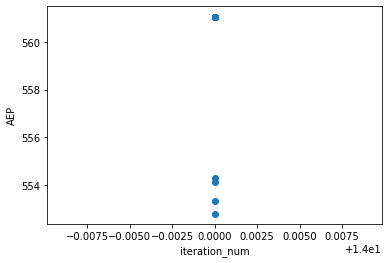

In [25]:
import matplotlib.pyplot as plt

plt.scatter(elite2['iteration_num'],elite2['AEP'])
plt.xlabel('iteration_num')
plt.ylabel('AEP')
plt.show()

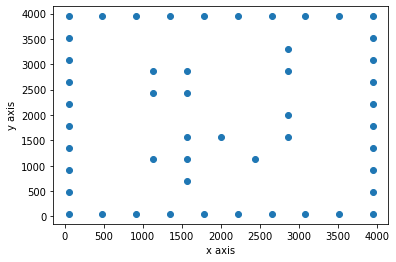

In [90]:
import matplotlib.pyplot as plt

plt.scatter(k['x'],k['y'])
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

In [89]:
#second submission value
fn_fitness_function(k)

  0%|          | 0/36 [00:00<?, ?it/s]

Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:01<00:00, 25.18it/s]

Total power produced by the wind farm is:  575.117826459794 GWh


575.1178264597938

# Submission file

In [91]:
k.to_csv("submission19.csv",index=False)

In [ ]:
type(k)

In [ ]:
checkConstraints(np.array(k),100)

In [ ]:
def binWindResourceData(wind_data_file_name):
        r"""
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Loads the wind data. Returns a 2D array with shape (36,15). 
        Each cell in  array is a wind direction and speed 'instance'. 
        Values in a cell correspond to probability of instance
        occurence.  

        :Called from
            main function

        :param
            wind_data_file_name - Wind Resource csv file  

        :return
            2D array with estimated probabilities of wind instance occurence. 
            Along: Row-direction (drct), Column-Speed (s)

                          |0<=s<2|2<=s<4| ...  |26<=s<28|28<=s<30|
            |_____________|______|______|______|________|________|
            | drct = 360  |  --  |  --  |  --  |   --   |   --   |
            | drct = 10   |  --  |  --  |  --  |   --   |   --   |
            | drct = 20   |  --  |  --  |  --  |   --   |   --   |
            |   ....      |  --  |  --  |  --  |   --   |   --   |
            | drct = 340  |  --  |  --  |  --  |   --   |   --   |
            | drct = 350  |  --  |  --  |  --  |   --   |   --   |        
        """

        # Load wind data. Then, extracts the 'drct', 'sped' columns
        df = pd.read_csv(wind_data_file_name)
        wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)

        # direction 'slices' in degrees
        slices_drct   = np.roll(np.arange(10, 361, 10, dtype=np.float32), 1)
        ## slices_drct   = [360, 10.0, 20.0.......340, 350]
        n_slices_drct = slices_drct.shape[0]

        # speed 'slices'
        slices_sped   = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 
                            18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0]
        n_slices_sped = len(slices_sped)-1


        # placeholder for binned wind
        binned_wind = np.zeros((n_slices_drct, n_slices_sped), 
                               dtype = np.float32)

        # 'trap' data points inside the bins. 
        for i in range(n_slices_drct):
            for j in range(n_slices_sped):     

                # because we already have drct in the multiples of 10
                foo = wind_resource[(wind_resource[:,0] == slices_drct[i])] 

                foo = foo[(foo[:,1] >= slices_sped[j]) 
                              & (foo[:,1] <  slices_sped[j+1])]

                binned_wind[i,j] = foo.shape[0] 

        wind_inst_freq   = binned_wind/np.sum(binned_wind)

        return(wind_inst_freq)


In [ ]:
wind_arr_2017 = binWindResourceData('Shell_Hackathon_Dataset/Wind Data/wind_data_2017.csv')
wind_arr_2015 = binWindResourceData('Shell_Hackathon_Dataset/Wind Data/wind_data_2015.csv')
wind_arr_2014 = binWindResourceData('Shell_Hackathon_Dataset/Wind Data/wind_data_2014.csv')

In [ ]:
type(wind_arr_2015)

In [ ]:
wind_arr_2017

In [ ]:
wind_arr_2015

In [ ]:
weight_1 = 0.6
weight_2 = 0.4


In [ ]:
np.average(a=[wind_arr_2017, wind_arr_2015], axis = 0, weights=[weight_1, weight_2])

In [ ]:
8.8011567e-04*0.6+6.6820555e-04*0.4

In [ ]:
def wind_avg():
    wind_arr_2017 = binWindResourceData('Shell_Hackathon_Dataset/Wind Data/wind_data_2017.csv')
    wind_arr_2015 = binWindResourceData('Shell_Hackathon_Dataset/Wind Data/wind_data_2015.csv')
    wind_arr_2014 = binWindResourceData('Shell_Hackathon_Dataset/Wind Data/wind_data_2014.csv')
    weight_1 = 0.6
    weight_2 = 0.2
    weight_3 = 0.2
    wind_avg = np.average(a=[wind_arr_2017, wind_arr_2015,wind_arr_2014], axis = 0, weights=[weight_1, weight_2,weight_3])
    return 


In [23]:
import os
os.getcwd()

'/home/3706b81a/shell'

#this function returns total aep value for each chromosome in initial population after checking constraints are satisfied.
def fn_fitness_function(turb_loc_list):
        # -*- coding: utf-8 -*-
    """
    Created on: xxxx
    @author   : Anon

    NAME
        Farm_Evalautor.py

    PYTHON VERSION   
        3.7.3 

    DESCRIPTION
        Calculates Annual Energy Production (AEP) of a Wind Farm
        ============================================================    

        Farm_Evalautor.py is a python file that calculates AEP (GWh)
        of a certain arrangement of wind turbines in a wind farm, under 
        given annual wind conditions. 

        The code in this script for wake-effect modeling is based on
        standard Jensen (PARK) model. 
        I. Katic, J. Hojstrup and N. Jensen, "A simple model for cluster 
        efficiency," in European Wind Energy Association Conference and 
        Exhibition, 1986.

        As its inputs, the code takes three data files containing info 
        about:
        - Turbine Locations
        - Turbine Power Curve
        - Annual Wind Conditions

    PACKAGE LIST
        You may need to install the packages Tqdm and Shapely in your
        python distribution. These are not pre-installed. 
        ============================================================
        Packages Used:
        Numpy
        Pandas
        Numba
        Tqdm
        Shapely
        math (built-in)
    """

    # Module List
    import numpy  as np
    import pandas as pd    
    from   numba  import njit                      # For some speed gains                    
    from   math   import radians as DegToRad       # Degrees to radians Conversion

    from shapely.geometry import Point             # Used in constraint checking
    from shapely.geometry.polygon import Polygon

    from tqdm import tqdm                          # For Progressbar
    # Use from tqdm import tqdm_notebook as tqdm for running in Jupyter Notebook  
    # Use from tqdm import tqdm for running in IDE Environ 



    def getTurbLoc(turb_loc_file_name):
        """ 
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Returns x,y turbine coordinates

        :Called from
            main function

        :param
            turb_loc_file_name - Turbine Loc csv file location

        :return
            2D array
        """

        df = pd.read_csv(turb_loc_file_name, sep=',')
        turb_coords = df.to_numpy(dtype = np.float32)
        return(turb_coords)
    def getTurblocation(turb_loc_list):
        turb_coords = np.array(turb_loc_list)
        return(turb_coords)

    def loadPowerCurve(power_curve_file_name):
        """
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Returns a 2D numpy array with information about
        turbine thrust coeffecient and power curve of the 
        turbine for given wind speed

        :called_from
            main function

        :param
            power_curve_file_name - power curve csv file location

        :return
            Returns a 2D numpy array with cols Wind Speed (m/s), 
            Thrust Coeffecient (non dimensional), Power (MW)
        """
        powerCurve = pd.read_csv(power_curve_file_name, sep=',')
        powerCurve = powerCurve.to_numpy(dtype = np.float32)
        return(powerCurve)
    
    def wind_avg():
        wind_arr_2017 = binWindResourceData('Shell_Hackathon_Dataset/Wind Data/wind_data_2017.csv')
        wind_arr_2015 = binWindResourceData('Shell_Hackathon_Dataset/Wind Data/wind_data_2015.csv')
        wind_arr_2014 = binWindResourceData('Shell_Hackathon_Dataset/Wind Data/wind_data_2014.csv')
        weight_1 = 1
        weight_2 = 0
        weight_3 = 0
        wind_avg = np.average(a=[wind_arr_2017, wind_arr_2015,wind_arr_2014], axis = 0, weights=[weight_1, weight_2,weight_3])
        return wind_avg


    def binWindResourceData(wind_data_file_name):
        r"""
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Loads the wind data. Returns a 2D array with shape (36,15). 
        Each cell in  array is a wind direction and speed 'instance'. 
        Values in a cell correspond to probability of instance
        occurence.  

        :Called from
            main function

        :param
            wind_data_file_name - Wind Resource csv file  

        :return
            2D array with estimated probabilities of wind instance occurence. 
            Along: Row-direction (drct), Column-Speed (s)

                          |0<=s<2|2<=s<4| ...  |26<=s<28|28<=s<30|
            |_____________|______|______|______|________|________|
            | drct = 360  |  --  |  --  |  --  |   --   |   --   |
            | drct = 10   |  --  |  --  |  --  |   --   |   --   |
            | drct = 20   |  --  |  --  |  --  |   --   |   --   |
            |   ....      |  --  |  --  |  --  |   --   |   --   |
            | drct = 340  |  --  |  --  |  --  |   --   |   --   |
            | drct = 350  |  --  |  --  |  --  |   --   |   --   |        
        """

        # Load wind data. Then, extracts the 'drct', 'sped' columns
        df = pd.read_csv(wind_data_file_name)
        wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)

        # direction 'slices' in degrees
        slices_drct   = np.roll(np.arange(10, 361, 10, dtype=np.float32), 1)
        ## slices_drct   = [360, 10.0, 20.0.......340, 350]
        n_slices_drct = slices_drct.shape[0]

        # speed 'slices'
        slices_sped   = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 
                            18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0]
        n_slices_sped = len(slices_sped)-1


        # placeholder for binned wind
        binned_wind = np.zeros((n_slices_drct, n_slices_sped), 
                               dtype = np.float32)

        # 'trap' data points inside the bins. 
        for i in range(n_slices_drct):
            for j in range(n_slices_sped):     

                # because we already have drct in the multiples of 10
                foo = wind_resource[(wind_resource[:,0] == slices_drct[i])] 

                foo = foo[(foo[:,1] >= slices_sped[j]) 
                              & (foo[:,1] <  slices_sped[j+1])]

                binned_wind[i,j] = foo.shape[0] 

        wind_inst_freq   = binned_wind/np.sum(binned_wind)

        return(wind_inst_freq)


    def rotatedFrame(turb_coords, wind_drct):
        """
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Rotates euclidean coordinates to downwind-crosswind coordinates.
        Rotate the axes such that the wind flow direction aligns with the
        positive x-axis. 

        :called from
            partAEP

        :param
            turb_coords   - 2D array. turbine euclidean x,y coordinates
            wind_drct     - wind direction in degrees. 
                            [{'N':0},{'E':90},{'S':180},{'W':270}]

        :return    
            Rotated turbine locations. 
        """

        # so that the wind flow direction aligns with the +ve x-axis.
        wind_drct = wind_drct-90

        # Convert inflow wind direction from degrees to radians
        wind_drct = DegToRad(wind_drct)

        # Contants for coordinate transformation 
        cos_dir = np.cos(wind_drct)
        sin_dir = np.sin(wind_drct)

        # Coordinate Transformation. Rotate coordinates to downwind, crosswind coordinates 
        rotate_coords      =    np.zeros((turb_coords.shape[0],2), dtype=np.float32)
        rotate_coords[:,0] =    (turb_coords[:,0] * cos_dir) - (turb_coords[:,1] * sin_dir)
        rotate_coords[:,1] =    (turb_coords[:,0] * sin_dir) + (turb_coords[:,1] * cos_dir)

        return(rotate_coords)


    @njit            # jensenParkWake is numba compiled function. Gives speed gains. 
    def jensenParkWake(n_turbs, turb_diam, rotate_coords, power_curve, wind_sped):
        """
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        For each turbine, returns the total velocity deficit due to the wakes from 
        all contributing upstream turbines for given particular wind instance i.e. 
        wind_sped and drct (indirectly represented by rotated rotate_coords). 
        Uses Jensen's (PARK) model. 

        :called from
            partAEP

        :param
            n_turbs      - Total number of turbines
            turb_diam    - Diameter of the turbine (m)
            rotate_coords- Rotated turbine coordinates
            power_curve  - For estimating thrust coeff (C_t) 
            wind_sped    - Wind Speed (m/s)

        :return
            Velocity deficit for each turbine. returns array
        """
        # turbine radius
        turb_rad = turb_diam/2

        # we use power_curve data as look up to estimate the thrust coeff.
        # of the turbine for the corresponding closest matching wind speed
        idx_foo  = np.argmin(np.abs(power_curve[:,0] - wind_sped))
        C_t      = power_curve[idx_foo,1]

        # Wake decay constant kw for the offshore case
        kw = 0.05 

        # velocity deficit suffered by each turbine for this particular wind instance
        # impact_on_ibyj - placeholder to calc vel deficit from all turbs on i                 
        impact_on_ibyj = np.zeros((n_turbs,n_turbs), dtype=np.float32) 

        # i - target turbine
        for i in range(n_turbs):   

            # looping over all other turbs to check their effect
            for j in range(n_turbs):             

                # Calculate the x-dist and the y-offset 
                # (wrt downwind/crosswind coordinates)
                x = rotate_coords[i,0] - rotate_coords[j,0]   
                y = rotate_coords[i,1] - rotate_coords[j,1]   

                # Naturally, no wake effect of turbine on itself
                if i!=j: 

                    # either j not an upstream turbine or wake not happening 
                    # on i because its outside of the wake region of j                    
                    if x<=0 or np.abs(y) > (turb_rad + kw*x):  
                        impact_on_ibyj[i,j] = 0.0

                    # otherwise, at target i, wake is happening due to j
                    else:                               
                        impact_on_ibyj[i,j] = (1-np.sqrt(1-C_t))*((turb_rad/(turb_rad + kw*x))**2)

        # Calculate Total vel deficit from all upstream turbs, using sqrt of sum of sqrs
        sped_deficit = np.sqrt(np.sum(impact_on_ibyj**2, axis = 1))

        return(sped_deficit)


    def partAEP(n_turbs, turb_diam, turb_coords, power_curve, wind_drct, wind_sped):
        """
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Returns total power produced by all the turbine for this particular 
        'wind instance' represented by wind_drct, wind_sped.

        :called from
            totalAEP

        :param
            n_turbs      - Total number of turbines
            turb_diam    - Diameter of the turbine (m)
            turb_coords  - 2D array turbine x,y coordinates
            power_curve  - For estimating thrust coeff, C_t
            wind_drct    - wind direction in degrees
            wind_sped    - Wind Speed (m/s)

        :return
            total power produced for single wind instance  
        """
        # For given wind_drct rotate coordinates to downwind/crosswind 
        rotate_coords = rotatedFrame(turb_coords, wind_drct)

        # Use the jensen park wake model to calc speed deficits by wake
        sped_deficit = jensenParkWake(n_turbs, turb_diam, rotate_coords, power_curve, wind_sped)

        # Placeholder for storing power output of turbines
        turb_pwr = np.zeros(n_turbs, dtype=np.float32)

        # calculate the individual turbine power for effective wind speed
        for i in range(n_turbs):

            # Effective windspeed due to the happening wake
            wind_sped_eff = wind_sped*(1.0 - sped_deficit[i])

            # we use power_curve data as look up to estimate the power produced
            # by the turbine for the corresponding closest matching wind speed
            idx_foo = np.argmin(np.abs(power_curve[:,0] - wind_sped_eff))
            pwr     = power_curve[idx_foo,2]

            turb_pwr[i] = pwr

        # Sum the power from all turbines for this wind instance
        power = np.sum(turb_pwr)

        return power


    def totalAEP(turb_diam, turb_coords, power_curve, wind_inst_freq):
        """
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Calculates the wind farm AEP

        :called from
            main 

        :param
            turb_diam       - Diameter of the turbine (m)
            turb_coords     - 2D array turbine euclidean coordinates
            power_curve     - For estimating thrust coeff (C_t)
            wind_inst_freq  - 2D array with estimated probabilities of 
                              wind instance occurence.(return from func 
                              binWindResourceData)

        :return
            wind farm AEP in Gigawatt Hours, GWh (float)
        """
        # number of turbines
        n_turbs        =   turb_coords.shape[0]
        assert n_turbs ==  50, "Error! Number of turbines is not 50."

        # direction 'slices' in degrees
        slices_drct   = np.roll(np.arange(10, 361, 10, dtype=np.float32), 1)
        ## slices_drct   = [360, 10.0, 20.0.......340, 350]
        n_slices_drct = slices_drct.shape[0]

        # speed 'slices'
        slices_sped   = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 
                            18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0]
        n_slices_sped = len(slices_sped)-1

        # Power produced by the wind farm from each wind instance
        farm_pwr = np.zeros((wind_inst_freq.shape), dtype=np.float32)

        # Looping over every wind instance and calc Power
        # set disable=True for disabling progressbar
        for i in tqdm(range(n_slices_drct), disable=False):
            for j in range(n_slices_sped): 

                # take the mid value as effective speed
                wind_drct =  slices_drct[i]
                wind_sped = (slices_sped[j] + slices_sped[j+1])/2

                pwr  = partAEP(n_turbs, turb_diam, turb_coords, 
                               power_curve, wind_drct, wind_sped)

                farm_pwr[i,j] = pwr

        # multiply the respective values with the wind instance probabilities 
        farm_pwr = wind_inst_freq * farm_pwr

        # now sum all values
        farm_pwr = np.sum(farm_pwr)

        # multiply farm_pwr by hours in a year
        year_hours = 365.*24.
        AEP = year_hours*farm_pwr

        # Convert MWh to GWh
        AEP = AEP/1e3
        return(AEP)


    def checkConstraints(turb_coords, turb_diam):
        """
        -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-

        Checks if the turbine configuration satisfies the two
        constraints:(i) perimeter constraint,(ii) proximity constraint 
        Prints which constraints are violated if any. Note that this 
        function does not quantifies the amount by which the constraints 
        are violated if any. 

        :called from
            main 

        :param
            turb_coords - 2d np array containing turbine x,y coordinates
            turb_diam   - Diameter of the turbine (m)

        :return
            None. Prints messages.   
        """
        bound_clrnc      = 50
        prox_constr_viol = False
        peri_constr_viol = False

        # create a shapely polygon object of the wind farm
        farm_peri = [(0, 0), (0, 4000), (4000, 4000), (4000, 0)]
        farm_poly = Polygon(farm_peri)

        # checks if for every turbine perimeter constraint is satisfied. 
        # breaks out if False anywhere
        for turb in turb_coords:
            turb = Point(turb)
            inside_farm   = farm_poly.contains(turb)
            correct_clrnc = farm_poly.boundary.distance(turb) >= bound_clrnc
            if (inside_farm == False or correct_clrnc == False):
                peri_constr_viol = True
                break

        # checks if for every turbines proximity constraint is satisfied. 
        # breaks out if False anywhere
        for i,turb1 in enumerate(turb_coords):
            for turb2 in np.delete(turb_coords, i, axis=0):
                if  np.linalg.norm(turb1 - turb2) < 4*turb_diam:
                    prox_constr_viol = True
                    break

        # print messages
        if  peri_constr_viol  == True  and prox_constr_viol == True:
              print('Somewhere both perimeter constraint and proximity constraint are violated\n')
        elif peri_constr_viol == True  and prox_constr_viol == False:
              print('Somewhere perimeter constraint is violated\n')
        elif peri_constr_viol == False and prox_constr_viol == True:
              print('Somewhere proximity constraint is violated\n')
        else: print('Both perimeter and proximity constraints are satisfied !!\n')

        return()


    if __name__ == "__main__":

        # Turbine Specifications.
        # -**-SHOULD NOT BE MODIFIED-**-
        turb_specs    =  {   
                             'Name': 'Anon Name',
                             'Vendor': 'Anon Vendor',
                             'Type': 'Anon Type',
                             'Dia (m)': 100,
                             'Rotor Area (m2)': 7853,
                             'Hub Height (m)': 100,
                             'Cut-in Wind Speed (m/s)': 3.5,
                             'Cut-out Wind Speed (m/s)': 25,
                             'Rated Wind Speed (m/s)': 15,
                             'Rated Power (MW)': 3
                         }
        turb_diam      =  turb_specs['Dia (m)']


        # Turbine x,y coordinates
        #turb_coords    =  getTurbLoc('Shell_Hackathon_Dataset/turbine_loc_test.csv')
        turb_coords      =  getTurblocation(turb_loc_list)
        # Load the power curve
        power_curve    =  loadPowerCurve('Shell_Hackathon_Dataset/power_curve.csv')

        # Pass wind data csv file location to function binWindResourceData.
        # Retrieve probabilities of wind instance occurence.
        #wind_inst_freq =  binWindResourceData('Shell_Hackathon_Dataset/Wind Data/wind_data_2017.csv')
        wind_inst_freq = wind_avg()

        # check if there is any constraint is violated before we do anything. Comment 
        # out the function call to checkConstraints below if you desire. Note that 
        # this is just a check and the function does not quantifies the amount by 
        # which the constraints are violated if any. 
        checkConstraints(turb_coords, turb_diam)

        print('Calculating AEP......')
        AEP = totalAEP(turb_diam, turb_coords, power_curve, wind_inst_freq) 
        print('Total power produced by the wind farm is: ', "%.12f"%(AEP), 'GWh')


        return AEP